## Wine dataset from (UCI) using the PCA Technique for Dimensionality Reduction

#### Part 1: Data Preprocessing

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import the dataset
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[: , 0:13].values     # feature metric
y = dataset.iloc[: , 13].values       # dependent variable

In [3]:
# split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=0)

In [4]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

#### Part 2: Applying the principal component analysis

In [5]:
# import the pca model
from sklearn.decomposition import PCA

In [6]:
# init the PCA model
pca = PCA(n_components = 2)       # n_compent is 2 on the basis of high variance

In [7]:
# fitting the feature metric data into PCA model
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [8]:
# explain the variance
explained_varience = pca.explained_variance_ratio_
explained_varience

array([0.34742496, 0.19120613])

#### Part 3: Applying Logistic Regressiom model after used PCA 

In [9]:
# import the logistic regression model from scikit learn
from sklearn.linear_model import LogisticRegression

In [10]:
# initialize the logistic regression model
classifier = LogisticRegression(random_state = 0)

In [11]:
# fitting the logistic regression model to the training  set
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Part 4: Making a prediction and visualize the result

In [12]:
# making the prediction of test test set result
y_pred = classifier.predict(X_test)
y_pred

array([3, 1, 2, 3, 2, 3, 3, 1, 2, 2, 1, 1, 3, 2, 1, 2, 3, 3, 1, 3, 2, 3,
       3, 2, 2, 2, 2, 2, 1, 1, 3, 3, 2, 3, 3, 3], dtype=int64)

In [13]:
# making a confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matric = confusion_matrix(y_test, y_pred)
confusion_matric

array([[ 0,  0, 14],
       [ 2, 13,  1],
       [ 6,  0,  0]], dtype=int64)

In [14]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.3611111111111111

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


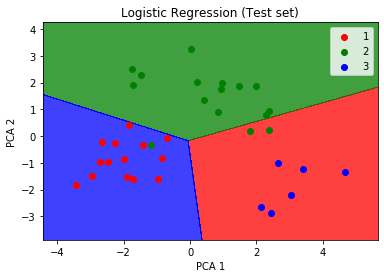

In [15]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()